# Case Study 1 : Data Science in Twitter Data
## FedEx vs UPS

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 7 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

### Which courier delivery service among FedEx and UPS does a better Online Customer Service? 
1. Collect twitter conversations between Support technicians and Customers from (@FedEXHelp and @UPSHelp twitter handles)
2. Get overall sentiment of each conversation
3. Get average response time of each conversation
4. Rate each delivery service based on the metrics obtained previously

## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [176]:
import twitter
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'EfYCvML3KABlHgurJhRktZcX2'
    CONSUMER_SECRET ='bJslWzrSthzXUs9qBMjyXrWFslie9L9RHLoBmiiXskhLJ51042'
    OAUTH_TOKEN = '710209200-84FbgvZMOlnxQqse6kXP70qJQ0xy63LZJPsKDown'
    OAUTH_TOKEN_SECRET = 'UVHWAOTF1BeZQa7MJs3m3vUVSvyCXdTvVukoe1EpOaJRN'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

### Report  statistics about the tweets you collected 

In [46]:
import glob, os 
import pandas as pd
from collections import Counter
fedex_path ='C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\fedex\\' # use your path
ups_path ='C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\' # use your path
fedex_files = glob.glob(os.path.join(fedex_path, "*.csv"))
ups_files = glob.glob(os.path.join(ups_path, "*.csv"))

fedexConvFrame = pd.DataFrame()
upsConvFrame = pd.DataFrame()
fedexUserFrame = pd.DataFrame()
upsUserFrame = pd.DataFrame()

fedex_conv = []
ups_conv = []
for file_ in fedex_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    fedex_conv.append(df)
for file_ in ups_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    ups_conv.append(df)
    
fedexConvFrame = pd.concat(fedex_conv)
upsConvFrame = pd.concat(ups_conv)
fedexUserFrame = pd.read_csv('C:\\Users\\Shyam\\Documents\\Samples\\Users\\fedex_userslist.csv')
upsUserFrame = pd.read_csv('C:\\Users\\Shyam\\Documents\\Samples\\Users\\ups_userslist.csv')

no_of_fedex = len(fedexConvFrame)
no_of_ups = len(upsConvFrame)
no_of_tweets = no_of_fedex + no_of_ups

fedex_tweets = fedexConvFrame.loc[fedexConvFrame['user_name'] == 'FedExHelp']
no_of_fedex_tweets = len(fedex_tweets)

ups_tweets = upsConvFrame.loc[upsConvFrame['user_name'] == 'UPSHelp']
no_of_ups_tweets = len(ups_tweets)

no_of_fedex_user_tweets = no_of_fedex - no_of_fedex_tweets
no_of_ups_user_tweets = no_of_ups - no_of_ups_tweets

no_of_fedex_conv = len(fedex_conv)
no_of_ups_conv = len(ups_conv)
total_conv = no_of_fedex_conv + no_of_ups_conv

total_user_frames = pd.concat([fedexUserFrame,upsUserFrame],sort=False)

print("Total number of tweets collected: ",no_of_tweets)
print("Number of service tweets (FedEx + UPS): ",no_of_fedex_tweets + no_of_ups_tweets)
print("Number of user tweets (FedEx users + UPS users): ",no_of_fedex_user_tweets + no_of_ups_user_tweets)
print("Total number of conversations (FedEx conversations + UPS conversations): ",total_conv)
print("Number of locations from where tweets were gathered: ",len(total_user_frames.location.unique()))

# The total number of tweets collected: 4424
# Number of service tweets: 1327 (FedEx + UPS)
# Number of user tweets: 3097 (FedEx users + UPS users)
# Number of conversations: 1230 (FedEx conversations + UPS conversations)
# Tweets from 675 locations




Total number of tweets collected:  4424
Number of service tweets (FedEx + UPS):  1327
Number of user tweets (FedEx users + UPS users):  3097
Total number of conversations (FedEx conversations + UPS conversations):  1230
Number of locations from where tweets were gathered:  675


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

######### 

############################## Most Frequent Word  ################################

all_tweets = (''.join(list(fed_tweet['text'])) + ''.join(list(ups_tweet['text']))).lower().split(" ") 
filtered_tweets = [w for w in all_tweets if not w in stop_words]
fdist = nltk.FreqDist(filtered_tweets)

k = dict(fdist.most_common(30))


e = pd.DataFrame.from_dict(k, orient='index',columns=['Frequency'])
pd.set_option('display.max_colwidth', -1)

e


,Frequency
,975
please,966
tracking,859
delivery,847
package,815
dm,792
phone,670
@ups,627
"number,",619
would,535


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [76]:
fedex_user_tweets = fedexConvFrame.loc[fedexConvFrame['user_name'] != 'FedExHelp']
popularTweets = fedex_user_tweets.sort_values(by=['retweets'],ascending=False)
top_10_popular=popularTweets[:10]
pd.set_option('display.max_colwidth', -1)
top_10_popular[['text','retweets']]

,text,retweets
0,"RT @FedEx: FedEx responds to questions on the National Rifle Association, gun safety and policy https://t.co/qYgmbyQ5jk https://t.co/02q1hD…",3217
5,RT @FedEx: Now you can say we’re even more attached! We’re proud to be the official jersey sponsor of the @memgrizz this season. https://t.…,587
0,Hey @FedEx do you guys know any good luthiers in Atlanta who can fix what your guys did? https://t.co/nsZx8t5vfJ,111
1,RT @FedExEurope: Thrilled to announce we are renewing our UEFA @EuropaLeague sponsorship for another 3 years. Bring on all those great nigh…,45
3,RT @CrossFit: When @FedEx is your job but CrossFit is life. https://t.co/8OEcUx5vTl,43
0,RT @matthewkheafy: Thanks @FedEx / @FedExHelp I need help. This was being setup for a tour next week. @Epiphone @EverTune8 https://t.co/b0U…,32
0,RT @matthewkheafy: Thanks @FedEx / @FedExHelp I need help. This was being setup for a tour next week. @Epiphone @EverTune8 https://t.co/b0U…,32
4,RT @FedExNews: .@FedEx named one of the 2018 Best Workplaces for Millennials by Fortune Magazine. Learn more: https://t.co/uPKBtrtkB5 https…,32
1,RT @matthewkheafy: Thanks @FedEx / @FedExHelp I need help. This was being setup for a tour next week. @Epiphone @EverTune8 https://t.co/b0U…,32
0,RT @matthewkheafy: Thanks @FedEx / @FedExHelp I need help. This was being setup for a tour next week. @Epiphone @EverTune8 https://t.co/b0U…,32


In [78]:
ups_user_tweets = upsConvFrame.loc[upsConvFrame['user_name'] != 'UPSHelp']
popularTweets = ups_user_tweets.sort_values(by=['retweets'],ascending=False)
top_10_popular=popularTweets[:10]
pd.set_option('display.max_colwidth', -1)
top_10_popular[['text','retweets']]

,text,retweets
18,"RT @StreetsblogNYC: You’ve heard how @FedEx @UPS @FreshDirect and other delivery companies say they’re good corporate citizens, but at a bi…",35
0,RT @JonyIveParody: .@UPSHelp Are iPhone pre-order deliveries delayed until Monday because UPS uses Apple Maps? 🤔 https://t.co/dIYWD3UnOG,24
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8
0,"Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOur @WNCN news team just had multiple boxes flying at us on I-440W just before the Six Forks exit.\r\n\r\nTried to get driver’s attention to no avail. #SafetyFirst https://t.co/OPCmPAZbeA",8
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8
0,RT @planefinder: 📱Ever wondered how you all get shiny new iPhone and Apple Watch devices tomorrow? Thank @UPSAirlines @UPS ✈️ https://t.co/…,8
0,"RT @newsladyB: Hey @UPS @UPSHelp you may want to tell your crew to close up that back door, oh and a few deliveries won’t be making it!\r\n\r\nOu…",8


In [84]:
mostFavoritedTweets=fedex_user_tweets.sort_values(by=['favorited'],ascending=False)
top_10_fav=mostFavoritedTweets[:10]
pd.set_option('display.max_colwidth', -1)
top_10_fav[['text','favorited']]

,text,favorited
0,Hey @FedEx do you guys know any good luthiers in Atlanta who can fix what your guys did? https://t.co/nsZx8t5vfJ,496
0,Thanks @FedEx / @FedExHelp I need help. This was being setup for a tour next week. @Epiphone @EverTune8 https://t.co/b0Ufy1CdJ5,188
3,FWIW guitar buds - Don’t ship or insure with @FedEx. Some of you saw the pictures of the guitar that they damaged in shipping. They recently denied the insurance claim we put through. The claims process was murky and hard to navigate as well. Don’t waste your time or money.,154
1,A while back I tweeted @FedEx @FedExHelp when my wedding dress box arrived damaged (dress is okay) They were prompt to contact me but today a beautiful registry gift arrived from the @fedex social media team! This has certainly proved their customer service goes above &amp; beyond!TY https://t.co/TsNQ8Bx7C9,52
7,"@mgtkn @FedEx Twitter Success!! In the midst of Florence, God made it happen and Mom has her chemo medicine!! Special thanks to all that helped, it means so much. @MichaelPerchick @FedExHelp https://t.co/YEe6jwu8n7",35
0,"@FedExHelp @FedEx @FedExPolicy Fed Ex in Fayetteville, NC has my mother’s Chemotherapy medication which she desperately needs. I’m asking for help to get the package but the Fayetteville location is closed for Hurricane Florence. Please, please I beg you to help me to help her!",19
2,"@FedExHelp Yeah, can you get Matt’s guitar to him without breaking it?",17
0,Wow thanks @FedEx @FedExPolicy @FedExHelp for your lovely delivery man who dumped my Lilly Pulitzer package on the middle of my front lawn for anyone to steal and on a pouring raining day. https://t.co/gT7DCom8Ma,17
0,"In a deal between @FedEx and #bikenyc, all bikers inconvenienced can ride off with any one package. https://t.co/VEkXKfGxLD",17
1,@FedExHelp Thx Andrew. Dming ya now!,14


In [83]:
mostFavoritedTweets=ups_user_tweets.sort_values(by=['favorited'],ascending=False)
top_10_fav=mostFavoritedTweets[:10]
pd.set_option('display.max_colwidth', -1)
top_10_fav[['text','favorited']]

,text,favorited
1,"If this is @UPS employees attitude to their customers, maybe @Apple should switch to FedEx. This might explain some of the horrible shipping issues UPS had with this round of Apple iPhone shipments. Theft or willful negligence? https://t.co/wks9m2yauM",30
0,So I am missing 1 pair @UPSHelp @UPS you guys stole my shoes! 💀 please do something about this box was open when I received the package 😤😤😤 https://t.co/ma37c616MZ,24
38,"Twitter uses have documented an irrefutable pattern of @ups drivers parking illegally and dangerously in bike lanes, with absolutely no attempt by the company to stop it. We believe that they tell their drivers to park wherever they want, regardless of how illegal or dangerous.",19
9,How many people have had #iPhone day ruined by #ups? My phone was not delivered and they can’t tell me where it is. @Apple @UPSHelp,14
0,"Thank you for the speedy service, @UPS https://t.co/KboqKjrnXg",13
0,Hey @UPS or @UPSHelp where is my VIP #reptourArlington box? Show is in less than two weeks and many people have theirs except me and @vgbz0703 PLEASE HELP!! @taylornation13 @taylorswift13 #reputationStadiumTour https://t.co/rwKPYQJWHE,10
7,This is ridiculous.@Apple and @ups have a lot of explaining to do with this iPhone release fiasco. Ordered my iPhone Xs at 3:09am ET.@UPSHelp is now telling me that my phone isn’t going to be delivered till Tuesday. Unacceptable.@Apple is silent on the delay. Beyond annoyed.,9
0,Sure sex is great but have yall ever checked @UPS to see your package is Out For Delivery Today?,8
39,This complete lack of driver oversight and refusal to stop its drivers from breaking the law is a direct threat to human life and we will not stand for it any longer. @UPS must offer a statement acknowledging its role in causing this man's death and promising to change.,7
50,This @UPS driver has obviously been told by his bosses that using bike lanes as loading/parking is totally fine as long as you put a cone out. News: it's not. You're still breaking the law and risking lives. Stop it. #loadinglosers https://t.co/NGqduMVGvN,5


**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

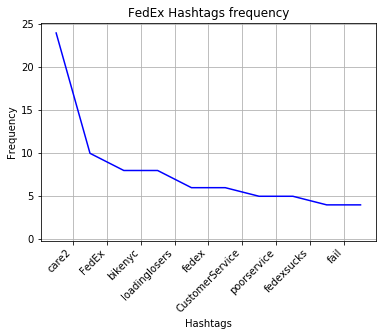

In [130]:
fedex_hashtags = pd.read_csv("C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\fedex\\entities\\hashtags.csv")
top_10_fedex = fedex_hashtags[:10]
fedex_hashtag_top10 = top_10_fedex['hashtags'].tolist()
fedex_freq_top10 = top_10_fedex['frequency'].tolist()

import numpy as np
import matplotlib.pyplot as plt

pos = np.arange(len(top_10_fedex))
width = 1.0     # gives histogram aspect to the bar diagram
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(fedex_hashtag_top10,rotation = 45, ha="right")
plt.grid(alpha=1)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('FedEx Hashtags frequency')
plt.plot(pos, fedex_freq_top10, width, color='b')
plt.show()

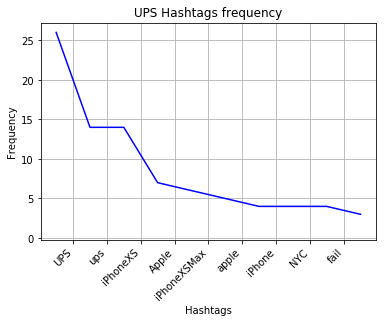

In [142]:
ups_hashtags = pd.read_csv("C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\hashtags.csv")
top_10_ups = ups_hashtags[:10]
ups_hashtag_top10 = top_10_ups['hashtag'].tolist()
ups_freq_top10 = top_10_ups['frequency'].tolist()

pos = np.arange(len(top_10_fedex))
width = 1.0     # gives histogram aspect to the bar diagram
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ups_hashtag_top10,rotation = 45, ha="right")
plt.grid(alpha=1)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('UPS Hashtags frequency')
plt.plot(pos, ups_freq_top10, width, color='b')
plt.show();

Plot a histogram of the number of user mentions in the list using the following bins.

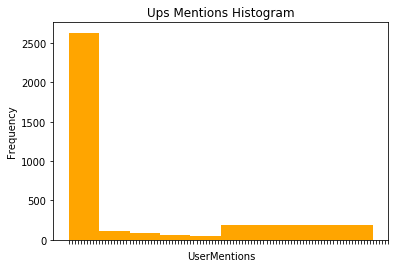

In [177]:
bins=[0, 10, 20, 30, 40, 50, 100]
ups_mentions = pd.read_csv("C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\mentions.csv")
ups_mentions_list = []
for index,row in ups_mentions.iterrows():
    for i in range(row['frequency']):
        ups_mentions_list.append(row['mentions'])

plt.hist([ups_mentions_list], color=['orange'], bins=bins)
plt.xlabel("UserMentions")
plt.ylabel("Frequency")
plt.title('Ups Mentions Histogram')
ax = plt.axes()
ax.get_xaxis().set_ticklabels([])
plt.show()

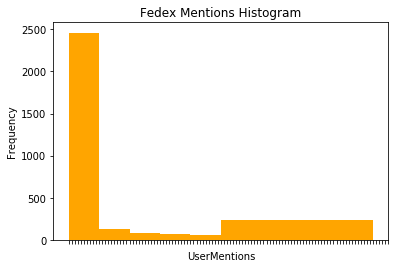

In [178]:
bins=[0, 10, 20, 30, 40, 50, 100]
fedex_mentions = pd.read_csv("C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\fedex\\entities\\mentions.csv")
fedex_mentions_list = []
for index,row in fedex_mentions.iterrows():
    for i in range(row['frequency']):
        fedex_mentions_list.append(row['mentions'])

plt.hist([fedex_mentions_list], color=['orange'], bins=bins)
plt.xlabel("UserMentions")
plt.ylabel("Frequency")
plt.title('Fedex Mentions Histogram')
ax = plt.axes()
ax.get_xaxis().set_ticklabels([])
plt.show()


 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [174]:
total_user_frames_sorted = total_user_frames.sort_values(by=['followers_count'],ascending=False)
popular_user = total_user_frames_sorted.iloc[0]
print(popular_user['user_name'],popular_user['user_id'],popular_user['followers_count'])
popular_user_name,popular_user_id,popular_user_follower = popular_user['user_name'],popular_user['user_id'],popular_user['followers_count']

Sp00nerism 185756522 344729


In [21]:
import tweepy

#auth = tweepy.OAuthHandler(..., ...)
#auth.set_access_token(..., ...)

CONSUMER_KEY = 'wnGxMyUhe7LUQu7vwDXxJMs0r'
CONSUMER_SECRET ='w9V9TGzPeD2dedeue0qCeusGibyZCbjkndYbU2fRQm4xULeZwF'
OAUTH_TOKEN = '2341368687-EayiDqOjdpxjblUtp5ElgJdNcYiCuQXBtucDIQf'
OAUTH_TOKEN_SECRET = 'bsaR0BXWsVj2WQzBI81DzZ9uoT7bDEFcQSjda5QPLkLHC'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [23]:
import numpy as np

friendslist = pd.DataFrame()
friendslist = api.friends_ids(185756522)
df=pd.DataFrame(np.array(friendslist).reshape(len(friendslist),1))
df

,0
0,225125248
1,307433771
2,821102114
3,28420827
4,776637281822121984
5,743662396892282881
6,2652256784
7,2362843891
8,16689451
9,265574469


In [24]:
followerslist = pd.DataFrame()
followerslist = api.followers_ids(185756522)
df=pd.DataFrame(np.array(followerslist).reshape(len(followerslist),1))
df

,0
0,1042900035573374976
1,1213561176
2,1044671316647968769
3,1032768270070427649
4,1045356859295760384
5,1042026967674048512
6,1012389758
7,221971504
8,731304237376798721
9,999473646790955008


In [25]:
followerslist = pd.DataFrame()
followerslist = api.followers_ids(185756522)
df=pd.DataFrame(np.array(followerslist).reshape(len(followerslist),1))
newdf=df.head(20)
newdf

,0
0,1042900035573374976
1,1213561176
2,1044671316647968769
3,1032768270070427649
4,1045356859295760384
5,1042026967674048512
6,1012389758
7,221971504
8,731304237376798721
9,999473646790955008


In [27]:
friendslist = pd.DataFrame()
friendslist = api.friends_ids(185756522)
df=pd.DataFrame(np.array(friendslist).reshape(len(friendslist),1))
df.head(20)

,0
0,225125248
1,307433771
2,821102114
3,28420827
4,776637281822121984
5,743662396892282881
6,2652256784
7,2362843891
8,16689451
9,265574469


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

Anyone who’s spent 20 minutes on hold while trying to reach customer service of company has thought “ isn’t there 
another way?”.A lot of these people who shared the same sentiment turned towards twitter for better experience. Since
more and more people are tweeting at companies , it is only natural for the company to respond through social media.
In this problem we focus on the two courier services namely, Fedx and UPS. We find how well are these companies able to
resolve issues to customers and compare performances of these 2 companies through the use of Twitter data. 
With this project, we aim to help choose the best courier service. The ranking has been done on the basis of number
of postive and negative tweets, also taking into consideration the response time of thesr tweets. These parameters have
been chosen keeping in mind the current need and  expectations of customers from the courier service they want to use.   


An analysis like this would help the user base to choose the perfect courier service for them, especially in emergency
cases, or when fragile or sensitive packages need to be sent. Further more, this could help the management of the
courier service itself for self evaluation.


Write codes to implement the solution in python:

################################################

The Code starts from next cell

Next 14 cells define functions needed to do data collection.

The 5 cells after that actually implement data collection method and make it ready for next sentiment analysis part

Next part sentiment analysis take conversations of a user with company and analyze by sentiment whether the company
satisfied the customer


In [1]:
def searchTweets(q,maxid=0):
    count = 100
    if maxid == 0:
        fedex_search_results = api.search(q=q, count=count, tweet_mode='extended', lang='en')
    else:
        fedex_search_results = api.search(q=q, count=count, tweet_mode='extended', lang='en', max_id=maxid)
    return fedex_search_results

In [11]:
def searchNTweets(q,n=1000):
    max_id = 0
    irange = int(n / 100)
    search_results = []
    for i in range(irange):
        search = searchTweets(q,max_id)
        search_results = search_results + search
        idlist = []
        for tweet in search:
            idlist.append(tweet._json['id'])
        max_id = min(idlist) - 1
    return search_results

In [ ]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [ ]:
def getConversations(search_results,user_service_dict,service_name):
    for result in search_results:
        user = result._json['user']['screen_name']
        if user_service_dict.get(user) == None:
            user_list = []
            # From User to Service
            user_search_results = api.user_timeline(id=user, lang='en', tweet_mode='extended',count=100)
            for resultu in user_search_results:
                if '@'+service_name in resultu._json['full_text'] or (resultu._json['in_reply_to_screen_name'] != None and service_name in resultu._json['in_reply_to_screen_name']):
                    user_list.append(resultu)
            # From Service to User
            q = '@' + user
            user_search_results = api.search(q=q, count=100, lang='en', tweet_mode='extended')
            for resultu in user_search_results:
                if service_name in resultu._json['user']['screen_name']:
                    user_list.append(resultu)
            user_list.append(result)
            user_service_dict[user] = user_list
        else:
            user_list = user_service_dict.get(user)
            user_list.append(result)
            
    return user_service_dict

In [ ]:
def getConversationsForRangeofTweets(search_results_split,user_service_dict,service_name,index,count):
    for i in range(index,index+count):
        print(i)
        user_service_dict = getConversations(search_results_split[i],user_service_dict,service_name)
    return user_service_dict

In [ ]:
from dateutil import parser
# Removes duplicate tweets and sorts conversation according to time 
def processUserServiceDict(user_service_dict):
    user_service = {}
    for key in user_service_dict:
        prevlist = user_service_dict.get(key)
        listofids = []
        newlist = []
        for val in prevlist:
            if val._json['id_str'] not in listofids:
                ind = 0
                for elemnew in newlist:
                    valtime = parser.parse(val._json['created_at'])
                    elemnewtime = parser.parse(elemnew._json['created_at'])
                    if elemnewtime > valtime:
                        break
                    ind += 1
                newlist.insert(ind,val)
                listofids.append(val._json['id_str'])
        user_service[key] = newlist
    return user_service

In [ ]:
def writeToCSV(user_service_dict,service_name,conv_path="C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\fedex\\",
               user_path="C:\\Users\\Shyam\\Documents\\Samples\\Users\\fedex_userslist"):
    userlist = []
    dict_df = {}
    userdf = pd.DataFrame(columns=['user_id','user_name','location','created_at','description','followers_count','friends_count',
                                  'listed_count','favourites_count','statuses_count','geo_enabled','time_zone'])
    index = -1
    for val in user_service_dict:
        tweets_data = user_service_dict[val]
        tweets = pd.DataFrame()
        tweets['tweet_id'] = list(map(lambda tweet: tweet._json['id_str'], tweets_data))
        tweets['user_id'] = list(map(lambda tweet: tweet._json['user']['id_str'], tweets_data))
        tweets['user_name'] = list(map(lambda tweet: tweet._json['user']['screen_name'], tweets_data))
        tweets['text'] = list(map(lambda tweet: tweet._json['full_text'], tweets_data))
        tweets['time'] = list(map(lambda tweet: tweet._json['created_at'], tweets_data))
        tweets['retweets'] = list(map(lambda tweet: tweet._json['retweet_count'], tweets_data))
        tweets['favorited'] = list(map(lambda tweet: tweet._json['favorite_count'], tweets_data))
        tweets['place'] = list(map(lambda tweet: tweet._json['place']['id'] if tweet._json['place'] != None else None, tweets_data))
        tweets['geo'] = list(map(lambda tweet: tweet._json['geo'] if tweet._json['geo'] != None else None, tweets_data))

        for tweet in user_service_dict[val]:
            if tweet._json['user']['screen_name'] == val:
                tweets_data = tweet
                user_id = tweets_data._json['user']['id_str']
                user_name = tweets_data._json['user']['screen_name']
                location = tweets_data._json['user']['location']
                created_at = tweets_data._json['user']['created_at']
                description = tweets_data._json['user']['description']
                followers_count = tweets_data._json['user']['followers_count']
                friends_count = tweets_data._json['user']['friends_count']
                listed_count = tweets_data._json['user']['listed_count']
                favourites_count = tweets_data._json['user']['favourites_count']
                statuses_count = tweets_data._json['user']['statuses_count']
                geo_enabled = tweets_data._json['user']['geo_enabled']
                time_zone = tweets_data._json['user']['time_zone']
                index += 1
                userdf.loc[index] = [user_id,user_name,location,created_at,description,followers_count,friends_count,listed_count,
                             favourites_count,statuses_count,geo_enabled,time_zone]
                break
        tweets.to_csv(conv_path+val+".csv")
        dict_df[val] = tweets
    user_time = calcResponseTime(dict_df,service_name)
    userdf['resp_time'] = 'NA'
    for index, row in userdf.iterrows():
        key = row['user_name']
        userdf.at[index, 'resp_time'] = user_time[key]
    userdf.to_csv(user_path+".csv")

In [ ]:
def calcResponseTime(tweetsdict,service_name):
    user_time = {}
    for key in tweetsdict:
        list_times_cur = []
        conv = tweetsdict[key]
        prev_user = service_name
        cur_user = ''
        user = key
        prev_time = ''
        for index, row in conv.iterrows():
            cur_user = row['user_name']
            if prev_user != cur_user:
                if cur_user == service_name or cur_user == user:
                    cur_time = parser.parse(row['time'])
                    if prev_time != '' and cur_user == service_name:
                        list_times_cur.append((cur_time-prev_time).total_seconds())
            prev_time = parser.parse(row['time'])
            prev_user = cur_user
        if len(list_times_cur) != 0:
            user_time[key] = sum(list_times_cur)/len(list_times_cur)
        else:
            user_time[key] = 'NA'
    return user_time

In [ ]:
def getEntities(user_service_dict):
    hashtags = []
    mentions = []
    for key in user_service_dict:
        for val in user_service_dict[key]:
            hashtag = val._json['entities']['hashtags']
            mention = val._json['entities']['user_mentions']
            for single_hashtag in hashtag:
                hashtags.append(single_hashtag['text'])
            for single_mention in mention:
                mentions.append(single_mention['screen_name'])
    return hashtags,mentions

In [ ]:
import collections
def sortEntitiesByFrequency(hashtags,mentions):
    hashtags_count = collections.Counter(hashtags)
    mentions_count = collections.Counter(mentions)
    return hashtags_count.most_common(),mentions_count.most_common()

In [ ]:
def fedex_entities(user_fedex_dict):
    hashtags,mentions = getEntities(user_fedex_dict) 
    hashtags_count,mentions_count = sortEntitiesByFrequency(hashtags,mentions)
    return hashtags_count,mentions_count

In [ ]:
def fedex():
    fedex_search_results = searchNTweets('@FedExHelp',1000)
    fedex_search_results_split = split_list(fedex_search_results,10)
    user_fedex_dict = getConversationsForRangeofTweets(fedex_search_results_split,0,10)
    user_fedex_dict_proc = processUserServiceDict(user_fedex_dict)
    writeToCSV(user_fedex_dict_proc,'FedExHelp',conv_path="C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\fedex\\",
               user_path="C:\\Users\\Shyam\\Documents\\Samples\\Users\\fedex_userslist")
    return user_fedex_dict_proc

In [ ]:
def ups_entities(user_ups_dict):
    hashtags,mentions = getEntities(user_ups_dict) 
    hashtags_count,mentions_count = sortEntitiesByFrequency(hashtags,mentions)
    return hashtags_count,mentions_count

In [ ]:
def ups():
    ups_search_results = searchNTweets('@UPSHelp',1000)
    ups_search_results_split = split_list(ups_search_results,10)
    user_ups_dict = getConversationsForRangeofTweets(ups_search_results_split,'UPS',0,10)
    user_ups_dict_proc = processUserServiceDict(user_ups_dict)
    writeToCSV(user_ups_dict_proc,'UPSHelp',conv_path="C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\",
               user_path="C:\\Users\\Shyam\\Documents\\Samples\\Users\\ups_userslist")
    return user_ups_dict_proc

################################### Code Ends - Data Collection starts


In [ ]:
ups_search_results = searchNTweets('@UPSHelp',1000)
len(ups_search_results)
ups_search_results_split = split_list(ups_search_results,10)

In [ ]:
import json
tname = ups_search_results_split[0][0]._json['user']['screen_name']
t_search_results = api.user_timeline(id=tname, lang='en', tweet_mode='extended',count=10)
# print(json.dumps(t_search_results[0]._json,indent=4))

In [ ]:
user_ups_dict = {}
user_ups_dict = getConversationsForRangeofTweets(ups_search_results_split,user_ups_dict,'UPS',9,1)
user_ups_dict_proc = processUserServiceDict(user_ups_dict)


writeToCSV(user_ups_dict_proc,'UPSHelp',conv_path="C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\",
               user_path="C:\\Users\\Shyam\\Documents\\Samples\\Users\\ups_userslist")

ups_hashtags, ups_mentions = ups_entities(user_ups_dict_proc)

In [ ]:
import csv

with open('C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\hashtags.csv','w', newline='') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['hashtag','frequency'])
    for row in ups_hashtags:
        csv_out.writerow(row)
        
with open('C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\mentions.csv','w', newline='') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['mentions','frequency'])
    for row in ups_mentions:
        csv_out.writerow(row)

In [ ]:
import glob, os 
import pandas as pd
from collections import Counter
path ='C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\' # use your path
allFiles = glob.glob(os.path.join(path, "*.csv"))
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
frame
frame['retweets'].max()
popularTweets=frame.sort_values(by=['retweets'],ascending=False)
popularTweets.to_csv('C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\mostretweeted.csv')
mostFavoritedTweets=frame.sort_values(by=['favorited'],ascending=False)
mostFavoritedTweets.to_csv('C:\\Users\\Shyam\\Documents\\Samples\\Conversation\\ups\\entities\\mostfavorited.csv')

In [8]:
#################
from textblob import TextBlob
import pandas as pd
import os
import csv
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english')) 

In [4]:
def v_senti(f, company):
    df = pd.read_csv(f)
    df['Vader Score'] = df.apply(lambda x: analyzer.polarity_scores(x['text']), axis=1)
    c = df.shape[1]
    objs = [df, pd.DataFrame(df['Vader Score'].tolist()).iloc[:, :c]]
    df2 = pd.concat(objs, axis=1).drop('Vader Score', axis=1)
    t = df2[['text','compound','neg','neu','pos']]
    df2['user_name'] == df2['user_name'].astype(str)
    df2 = df2[~df2['user_name'].str.match(company)]
    total = df2['compound'].sum()/df2.shape[0]
    return [df2['user_name'].iloc[0],total],t

In [5]:
d_path = os.getcwd()

files_fed = glob.glob(d_path + '/Conversation/fedex/*')
files_ups = glob.glob(d_path + '/Conversation/ups/*')

fed = []
fed_tweet = pd.DataFrame([],columns=['text','compound','neg','neu','pos'])
ups = []
ups_tweet = pd.DataFrame([],columns=['text','compound','neg','neu','pos'])

for x in files_fed:
    a , b = v_senti(x,"FedExHelp")
    fed.append(a)
    fed_tweet = fed_tweet.append(b,ignore_index=True)

for y in files_ups:
    c , d = v_senti(y,"UPSHelp")
    ups.append(c)
    ups_tweet = ups_tweet.append(d,ignore_index = True)

In [15]:
################# Merged #################################

f_senti = pd.DataFrame(fed,columns = ["user_name","sentiment"])
u_senti = pd.DataFrame(ups,columns = ["user_name","sentiment"])

f_user = pd.read_csv(d_path + '/Users/fedex_userslist.csv')
u_user = pd.read_csv(d_path + '/Users/ups_userslist.csv')

fedex = f_user.merge(f_senti, left_on='user_name', right_on='user_name', how='inner')
ups = u_user.merge(u_senti, left_on='user_name', right_on='user_name', how='inner')

fedex = fedex.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
ups = ups.drop(['Unnamed: 0'], axis=1)

fedex.to_csv(d_path + '/Users/fedex.csv', encoding = 'utf-8')
ups.to_csv(d_path + '/Users/ups.csv', encoding = 'utf-8')

fedex.head()

,user_id,user_name,location,created_at,description,followers_count,friends_count,listed_count,favourites_count,statuses_count,geo_enabled,time_zone,resp_time,sentiment
0,1042143614997069824,KristyE15900845,NaN,Tue Sep 18 20:09:34 +0000 2018,NaN,0,0,0,1,15,False,NaN,488.0,0.334555
1,261442084,natalieraduazzo,NaN,Sat Mar 05 23:51:55 +0000 2011,NaN,7,94,0,67,105,False,NaN,512.0,-0.071175
2,2430162042,CVeresan,NaN,Sun Apr 06 09:02:11 +0000 2014,Teaching. Learning. Sciencing. 😎,396,1043,39,8463,2107,True,NaN,NaN,0.669600
3,15754153,artbaretta,London,Wed Aug 06 19:46:01 +0000 2008,I write for @Xtra_Mile and myself. Maybe it's time I wrote that book I've told you about. // Editor of @theculturediary website for HMG. He/ him. Pic: @BenMorse,603,859,20,8591,15790,True,NaN,336.0,0.324725
4,951819043,MAB_Esq,NaN,Fri Nov 16 14:44:05 +0000 2012,NaN,2,86,0,8,13,False,NaN,1949.0,-0.261350


In [16]:
ups.head()

,user_id,user_name,location,created_at,description,followers_count,friends_count,listed_count,favourites_count,statuses_count,geo_enabled,time_zone,resp_time,sentiment
0,559477766,ContinueCommeCa,NaN,Sat Apr 21 12:10:56 +0000 2012,#PCF #FDG Contre TOUT fétichisme de parti ! — “Aujourd'hui les salauds sont sincères.” Godard #oupas — J'assume mes choix et TOUS les débats corrects.,3261,3097,98,3083,78082,False,NaN,590.000000,0.041500
1,517023286,benk,"Minot, ND",Wed Mar 07 00:02:03 +0000 2012,@RiotGames & @100Thieves Moderator • Influence Greatness @Problem • Active Duty Air Force • I Love Cats | contact@benkelsey.com,6761,1047,30,27249,32799,True,NaN,NaN,0.000000
2,11162,elliottp,"Seattle, WA",Tue Oct 31 04:05:23 +0000 2006,"I love life, people and the Internet! Product marketer @AlaskaAir. Views & opinions expressed here are my own.",2468,647,203,10148,12636,True,NaN,1760.666667,-0.244833
3,250534177,SYDinLA,Los Angles,Fri Feb 11 08:34:56 +0000 2011,"Life connoisseur, lucky nomad, love international politics, content strategist & nutella lover",172,832,7,430,1367,True,NaN,1018.500000,-0.140233
4,396923455,HustleGz,"Brooklyn, NY",Sun Oct 23 23:57:05 +0000 2011,Instagram:forevertriplecccs M.B.A.M 💰💰,1169,660,19,3004,28116,True,NaN,621.500000,-0.066533


In [18]:
fed_tweet[['text','compound']].head()

,text,compound
0,"@FedExHelp Sent, thank you",0.3612
1,"@FedExCanadaHelp has no problem reaching out to people who have crappy experiences with @FedExHelp, but in order to speak to @fedexhelp they expect you to follow them &amp; do everything, they wont simply tweet inquiring about the problem. Typical American garbage company. #TooBig4U",-0.7845
2,"@FedExHelp Shipped a package from Seattle, WA to Dallas, TX. Paid extra for next day delivery by 10:30 am on 9/21. My package still hasn't been delivered and no info provided. What is going on???",0.3763
3,"@FedExHelp to be clear. I used my Corporate Mail Center to ship a next day delivery package on Thursday to Dallas, TX. Paid extra for next day air. My package still hasn't been delivered!",0.7290
4,"@1xicana Hi, this is Andre. We will be happy to research this for you. Please DM your tracking number, delivery address, and contact number.",0.7650


In [19]:
ups_tweet[['text','compound']].head()

,text,compound
0,@UPSHelp Answer my DM please.,0.3182
1,@TheUPSStore You mean like a vacuum sealer? https://t.co/87rR1JHdie,0.3612
2,Way to go @UPS... https://t.co/JwiL5ukR2G,0.0000
3,@128keaton This shipment is showing the address may have errors. Can you please provide me the full delivery address along with your phone number? ^ML https://t.co/wKJHDXWGRQ,0.0516
4,@UPSHelp DM? I’m not putting my address on the internet. I’ve spoken with 6 reps promising that I’d get my package today. Guess what. It’s in Nashville. https://t.co/gJdPXAV5vq,0.4019


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


The average response time for fedex in seconds is  6559.333900136497 

The average response time for ups is seconds is  3343.1869099832893 

The average response time for fedex in minutes is   109.32223166894161 

The average response time for ups in minutes is  55.719781833054824 

The number of unsatisfied customers on fedex are 227 

The negative average sentiment value for fedex is -0.3503234467929515 

The number of neutral customers on fedex are 69 

The neutral average sentiment for fedex is  0 

The number of satisfied customers for fedex are 268 

The positive average sentiment for fedex is  0.39218128721641793 

The number of unsatisfied customers for ups are 118 

The average negative sentiment for ups is  -0.32568160590677964 

The number of neutral customers on ups are  35 

The neutral sentiment on ups is  0 

The number of satisfied customers on ups are 80 

The positive sentiment on ups is  0.3180245720625 

              Number of satisfied customers  \
[Fedex, UPS]   

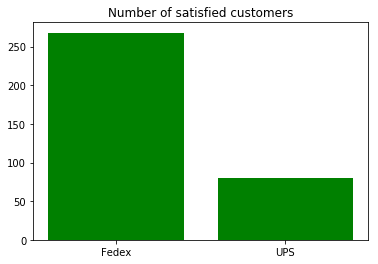

		Average sentiment of satisfied customers 



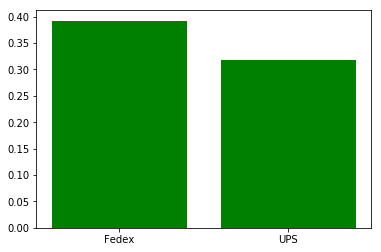

		Number of unsatisfied customers 



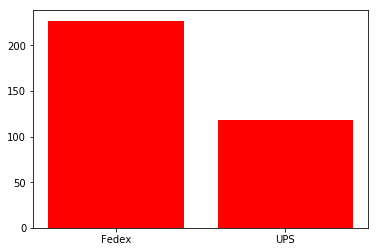

		Average sentiment of unsatisfied customers 



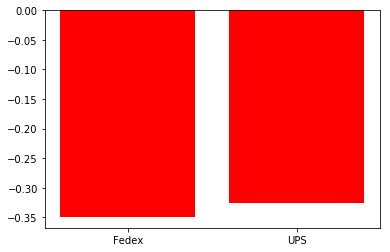

		Number of neutral customers 



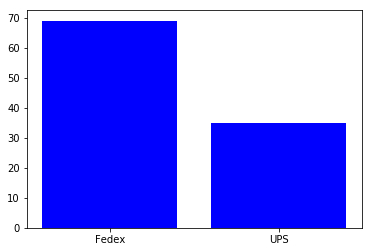

		Response time(min) for satisfied customers 



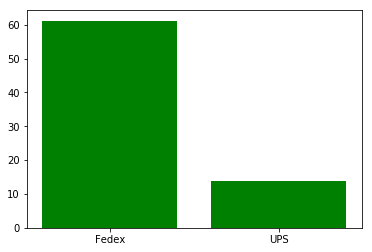

		Response time (min) for unsatisfied customers 



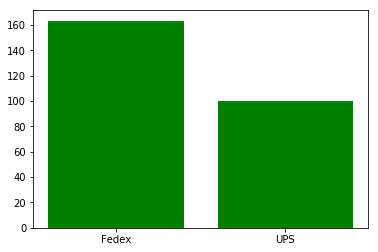

In [32]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
a=2059630.84464286 # The total response time from 572 entries taken from fedex_userslist_time.csv file
b=571-257  # 257 values had no response time
c=a/b
print('The average response time for fedex in seconds is ',c,'\n')
d=c/60
e=1524493.23095238
f=659-203 # 203 values had no response time
g=e/f
h=g/60
#No of users with negative sentiment for FedEX=145
avg_res_fedex_neg=1422293.94/(145*60) # Response time for unsatisfied customers from fedex.csv
#No of users with positive sentiment for FedEX=131
avg_res_fedex_pos=480922.40/(131*60)  # Response time for satisfied customers from fedex.csv
#No of users with negative sentiment for UPS=92
avg_res_ups_neg=551064.58/(92*60) # Response time for unsatisfied customers from ups.csv
#No of users with positive sentiment for ups=96
avg_res_ups_pos=78960.1/(96*60) #Response time for satisfied customers from ups.csv
print('The average response time for ups is seconds is ',g,'\n')
print('The average response time for fedex in minutes is  ',d,'\n')
print('The average response time for ups in minutes is ',h,'\n')
neg_count_fedex=227 # Taken from fedex.csv
neg_sentiment_fedex=-79.523422422 # Total negative sentiment value
avg_neg_sentiment_fedex=neg_sentiment_fedex/neg_count_fedex
print('The number of unsatisfied customers on fedex are',neg_count_fedex,'\n')
print('The negative average sentiment value for fedex is',avg_neg_sentiment_fedex,'\n')
neutral_count_fedex= 69
avg_neutral_sentiment_fedex=0 # Neutral sentiment value
print('The number of neutral customers on fedex are',neutral_count_fedex,'\n')
print('The neutral average sentiment for fedex is ',avg_neutral_sentiment_fedex,'\n')
pos_count_fedex=268
pos_sentiment_fedex=105.104584974
pos_avg_sentiment_fedex=pos_sentiment_fedex/pos_count_fedex # Average positive sentiment value
print('The number of satisfied customers for fedex are',pos_count_fedex,'\n')
print('The positive average sentiment for fedex is ',pos_avg_sentiment_fedex,'\n')
neg_count_ups=118 # Taken from ups.csv
neg_sentiment_ups=-38.430429497
neg_avg_sentiment_ups=neg_sentiment_ups/neg_count_ups
print('The number of unsatisfied customers for ups are',neg_count_ups,'\n')
print('The average negative sentiment for ups is ', neg_avg_sentiment_ups,'\n')
neutral_count_ups=35
neutral_sentiment_ups=0
print('The number of neutral customers on ups are ',neutral_count_ups,'\n')
print('The neutral sentiment on ups is ', neutral_sentiment_ups,'\n')
pos_count_ups=80
pos_sentiment_ups=25.441965765
pos_avg_sentiment_ups=pos_sentiment_ups/pos_count_ups
print('The number of satisfied customers on ups are',pos_count_ups,'\n')
print('The positive sentiment on ups is ',pos_avg_sentiment_ups,'\n')

mat=np.zeros(shape=(2,7))
mat[0][0]=pos_count_fedex
mat[0][1]=pos_avg_sentiment_fedex
mat[0][2]=neg_count_fedex
mat[0][3]=avg_neg_sentiment_fedex
mat[0][4]=neutral_count_fedex
mat[0][5]=avg_res_fedex_pos
mat[0][6]=avg_res_fedex_neg
mat[1][0]=pos_count_ups
mat[1][1]=pos_avg_sentiment_ups
mat[1][2]=neg_count_ups
mat[1][3]=neg_avg_sentiment_ups
mat[1][4]=neutral_count_ups
mat[1][5]=avg_res_ups_pos
mat[1][6]=avg_res_ups_neg
columns=['Number of satsified customers','Average sentiment of satisfied customers','Number of unsatisfied customers','Average sentiment of unsatisfied customers','Number of neutral customers','Response time(min) for satisfied customers','Response time (min) for unsatisfied customers']
s=pd.DataFrame(data=mat)
s.columns=['Number of satisfied customers','Average sentiment of satisfied customers','Number of unsatisfied customers','Average sentiment of unsatisfied customers','Number of neutral customers','Response time(min) for satisfied customers','Response time (min) for unsatisfied customers']
s.index.name=['Fedex','UPS']
print(s)


print('\t\tNumber of satisfied customers','\n')
plt.bar(s.index.name, s['Number of satisfied customers'], color="green")
plt.title("Number of satisfied customers")
plt.show()


print('\t\tAverage sentiment of satisfied customers','\n')
plt.bar(s.index.name, s['Average sentiment of satisfied customers'], color="green")
plt.show()

print('\t\tNumber of unsatisfied customers','\n')
plt.bar(s.index.name, s['Number of unsatisfied customers'], color="red")
plt.show()

print('\t\tAverage sentiment of unsatisfied customers','\n')
plt.bar(s.index.name, s['Average sentiment of unsatisfied customers'], color="red")
plt.show()
print('\t\tNumber of neutral customers','\n')
plt.bar(s.index.name, s['Number of neutral customers'], color="blue")
plt.show()
print('\t\tResponse time(min) for satisfied customers','\n')
plt.bar(s.index.name, s['Response time(min) for satisfied customers'], color="green")
plt.show()
print('\t\tResponse time (min) for unsatisfied customers','\n')
plt.bar(s.index.name, s['Response time (min) for unsatisfied customers'], color="green")
plt.show()




